In [1]:
import fft_interp_wrappers as wrap

### get samples exclusively at least 44100 hz
- should we also be inspecting the pre-interpolated data?
- do we want to graph spectro on linear scale?

- 2 samples from .wav 0.5-3.5 seconds long
- 2 samples from .mp3 0.5-3.5 seconds long (BOTH MP3 48,000 SAMPLES

(1025, 22403)


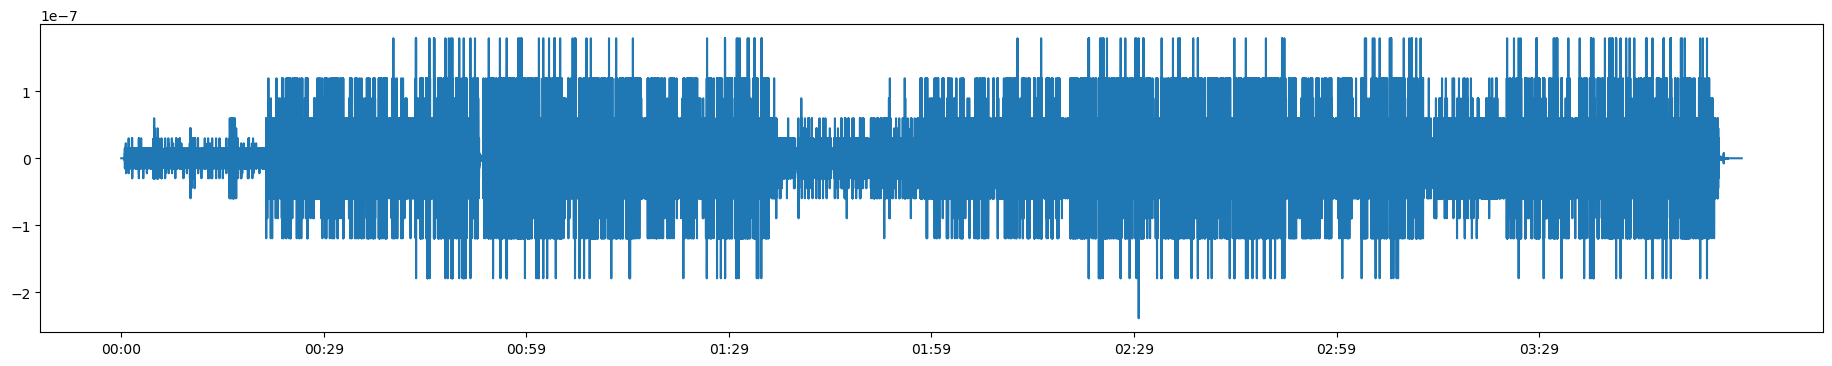

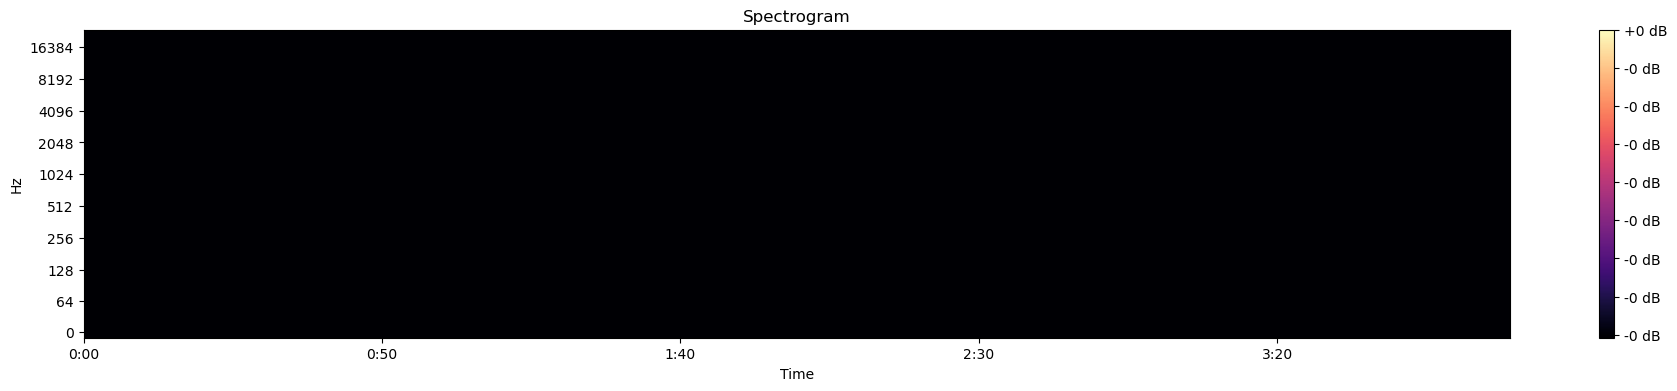

In [5]:
# This code just compares the original samples to the samples after going through FFT then iFFT to show that step isn't introducing error.

# Validate that FFT/iFFT isn't the source of any error we find
smp,sr = wrap.mp3_to_samples('samples/Bas - Tribe with J.Cole.mp3')
smp = smp[:11469824] # trim samples before FFT so sizes match after iFFT

fmag,freq = wrap.samples_to_freq(smp)
rev_smp = wrap.freq_to_samples(freq)
print(freq.shape)
# save_samples_to_wav(smp-rev_smp,sr,"test_tribe.wav") # save file to manually listen
diff = smp-rev_smp
wrap.graph_samples(diff,sr,figsize=wrap.scale_fig_size(len(smp))) # graph difference
wrap.graph_spectro(wrap.samples_to_freq(diff)[0],sr,figsize=wrap.scale_fig_size(len(diff))) # graph difference spectrogram
del smp,fmag,freq,rev_smp,diff

RMSE of reconstruction: 0.024840013687006716
Sample reconstruction complete -> starting FFT
FFT Complete -> constructing charts


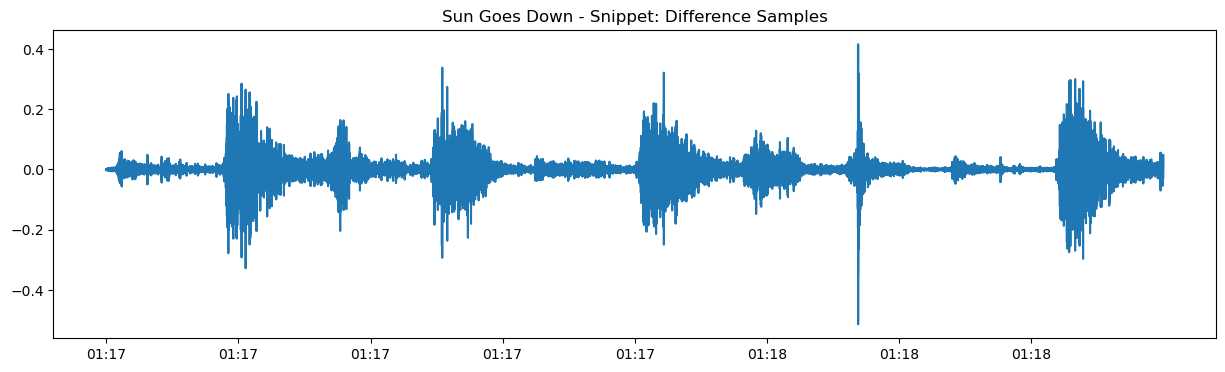

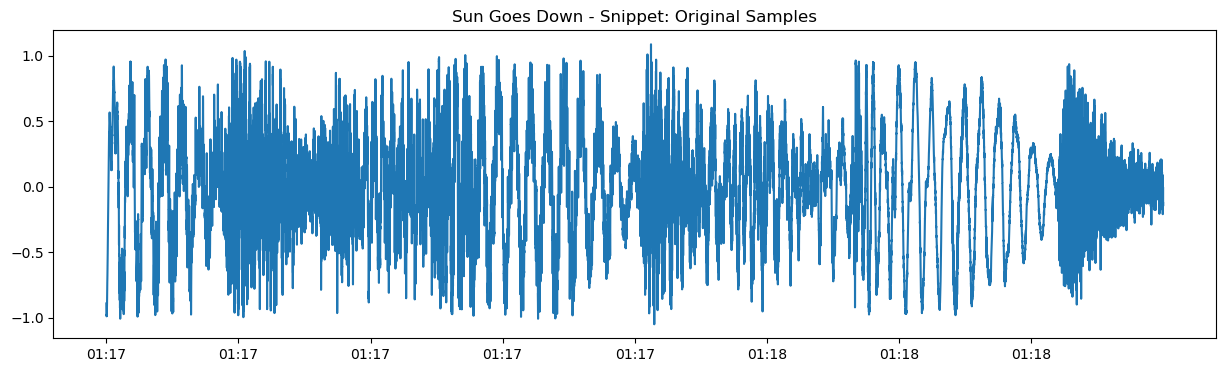

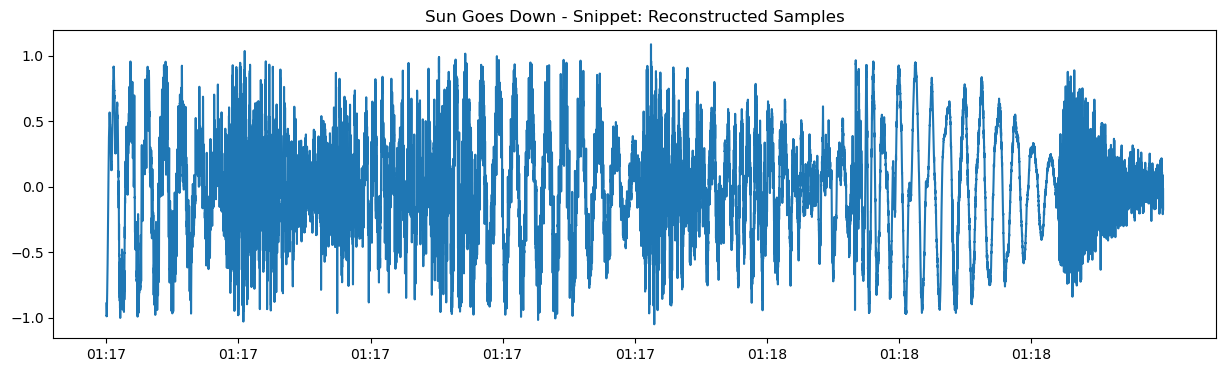

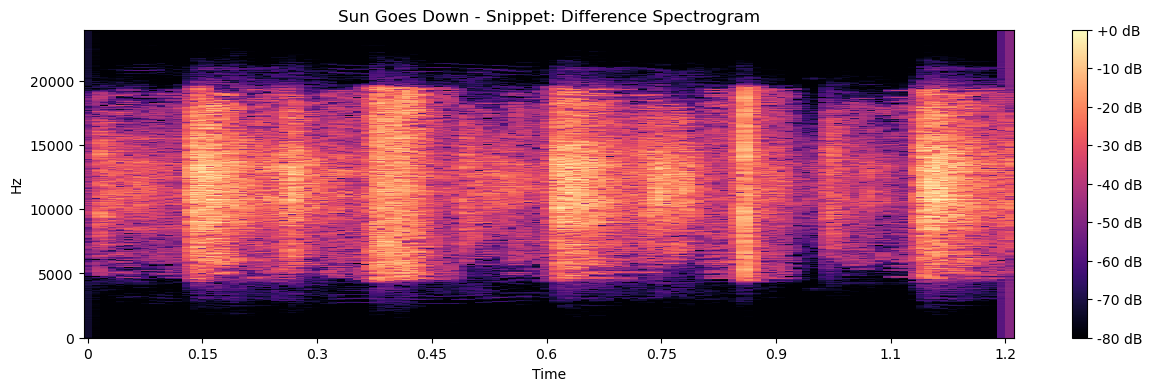

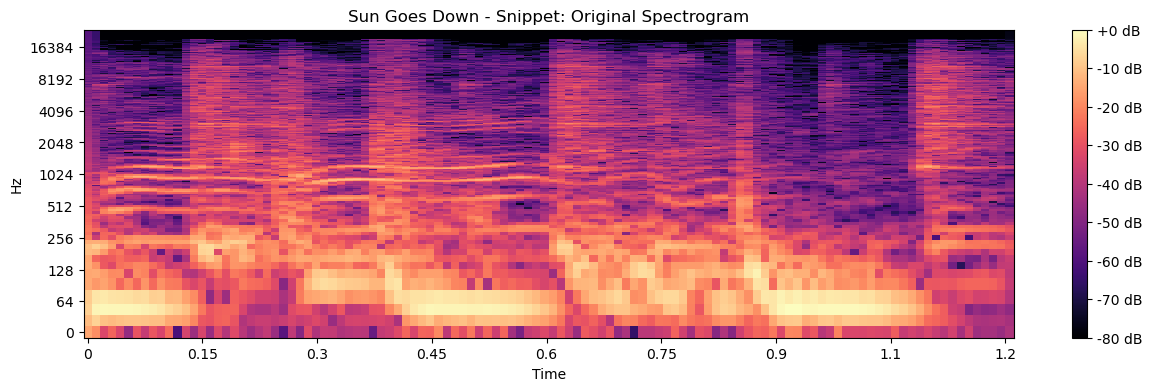

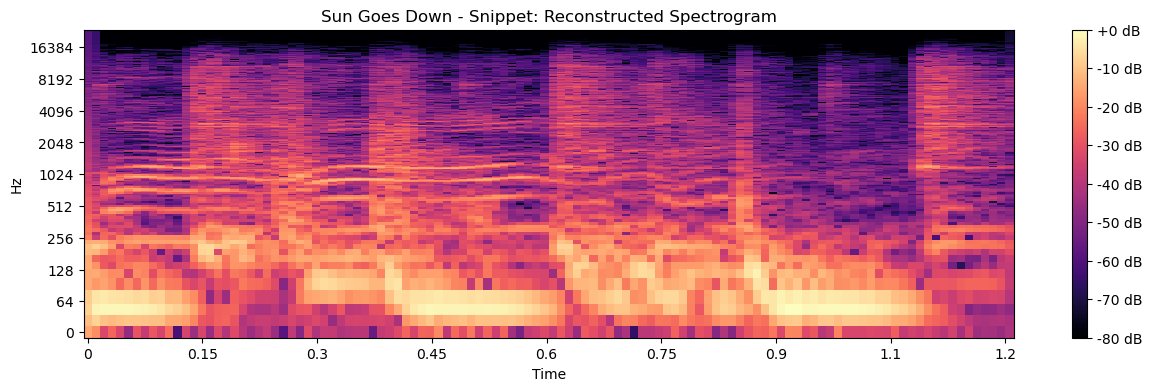

RMSE of reconstruction: 0.010209526105471245
Sample reconstruction complete -> starting FFT
FFT Complete -> constructing charts


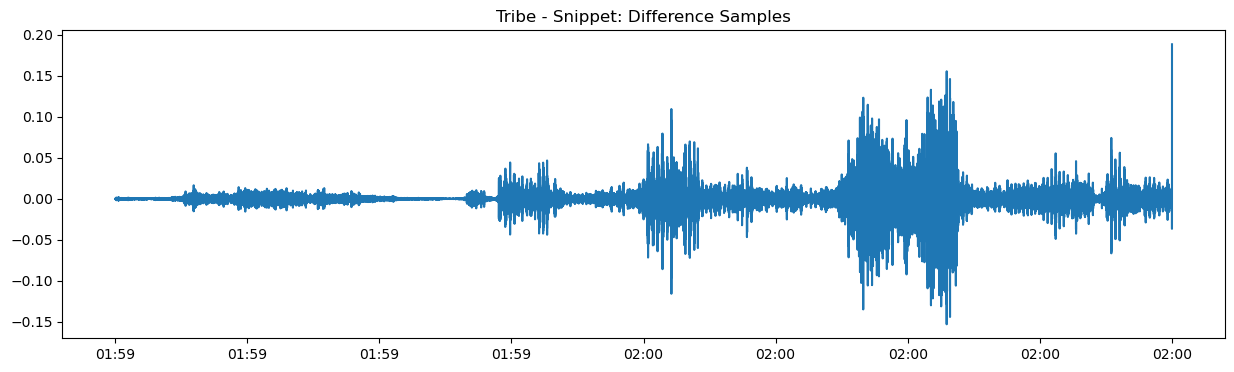

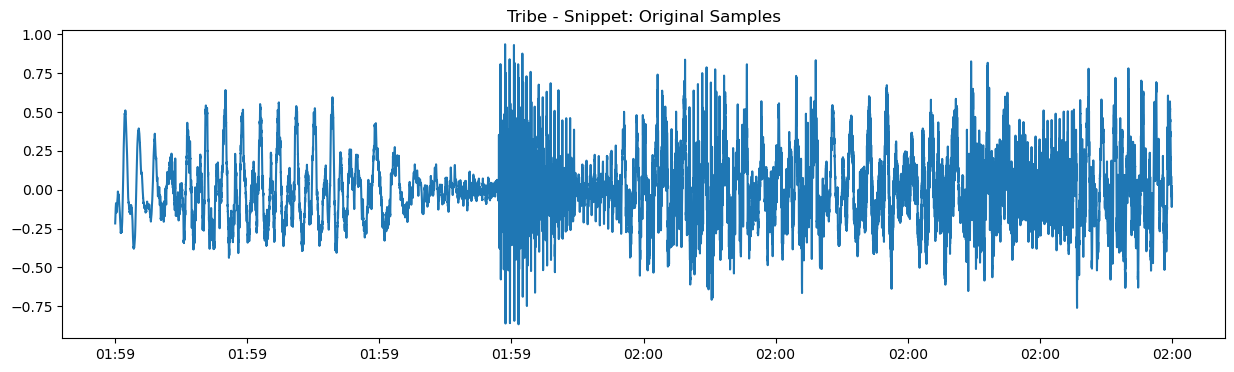

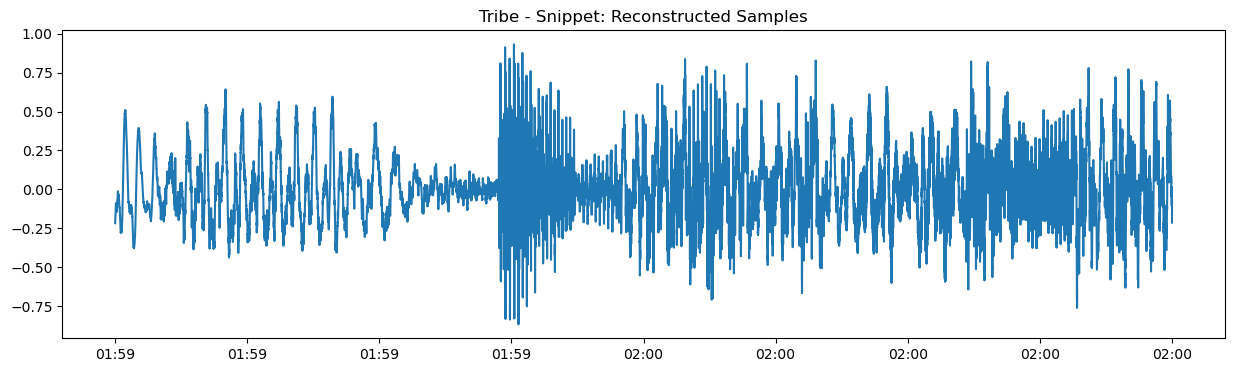

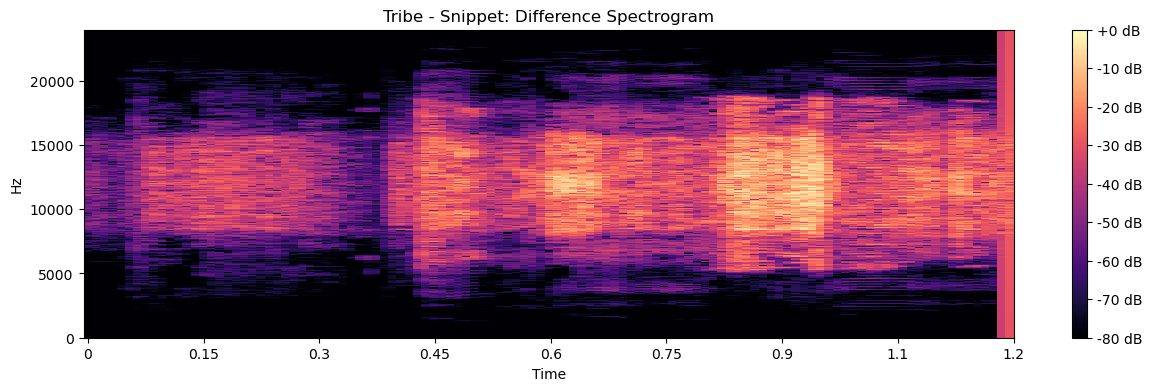

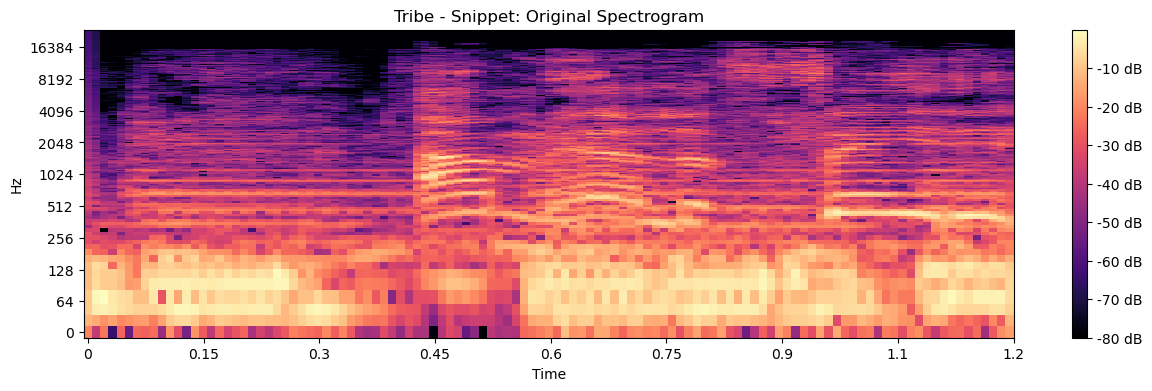

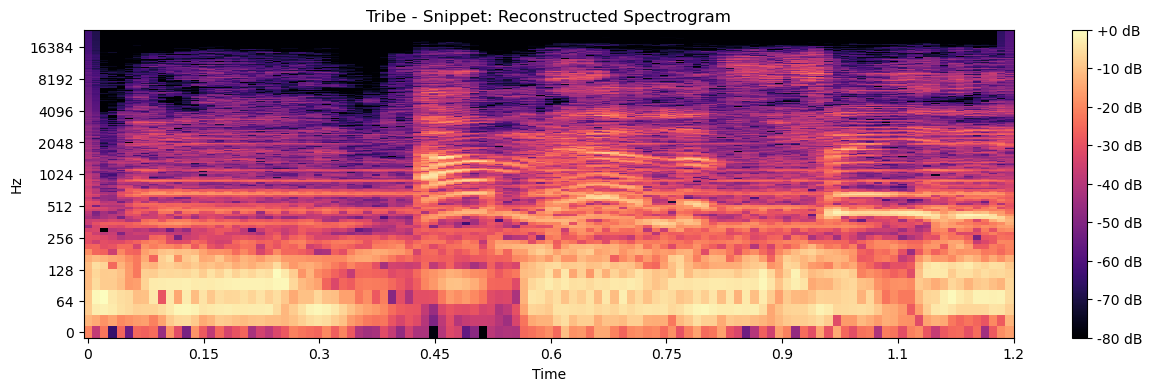

RMSE of reconstruction: 0.004148688249834188
Sample reconstruction complete -> starting FFT
FFT Complete -> constructing charts


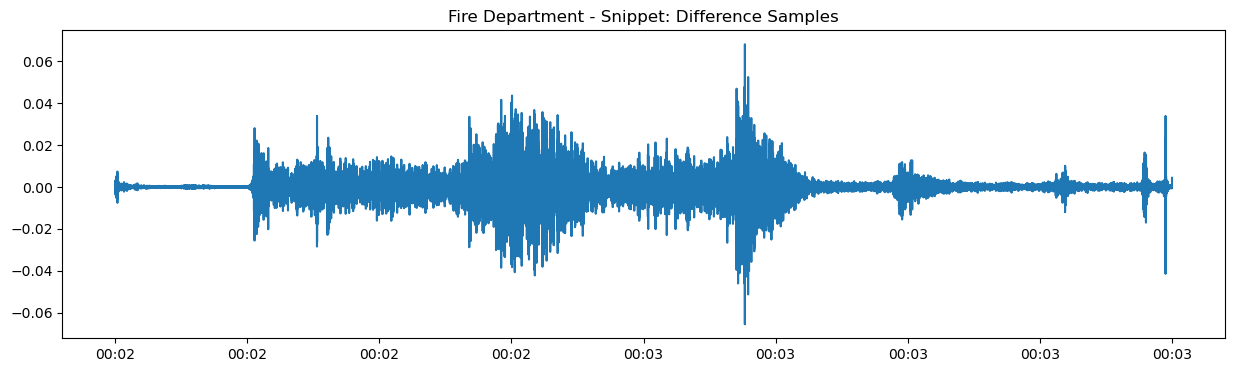

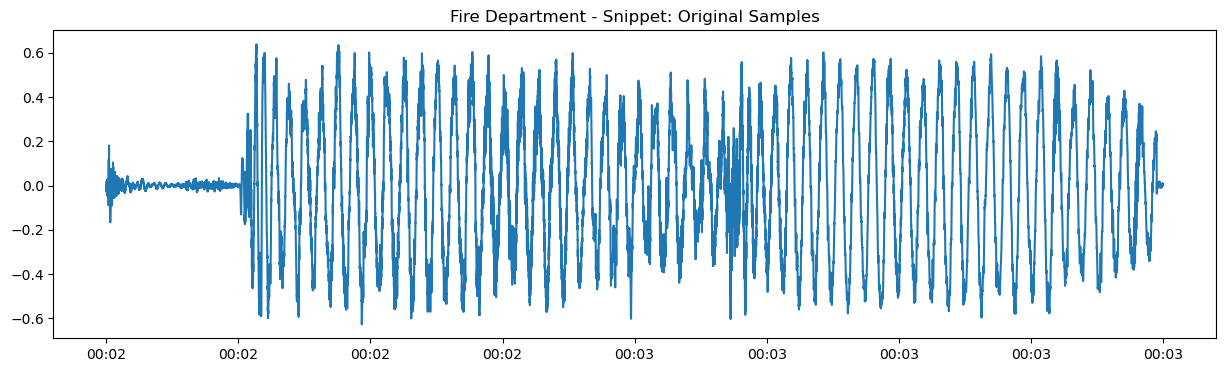

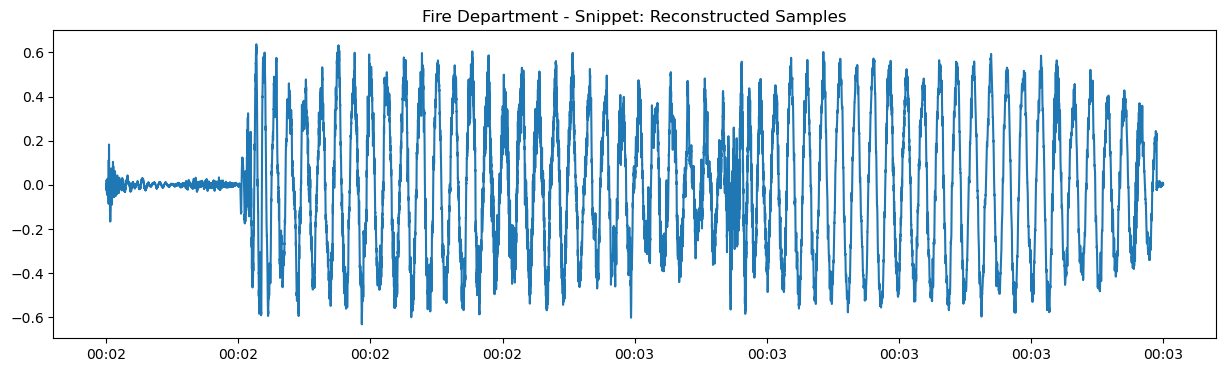

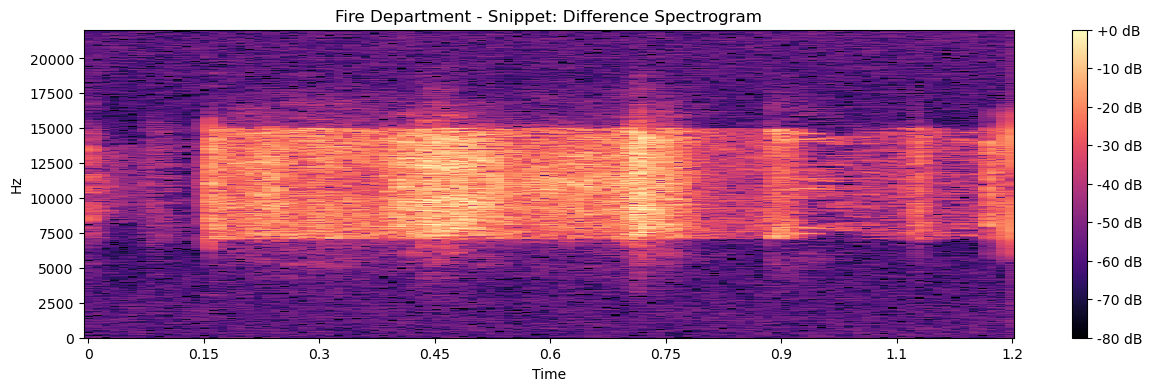

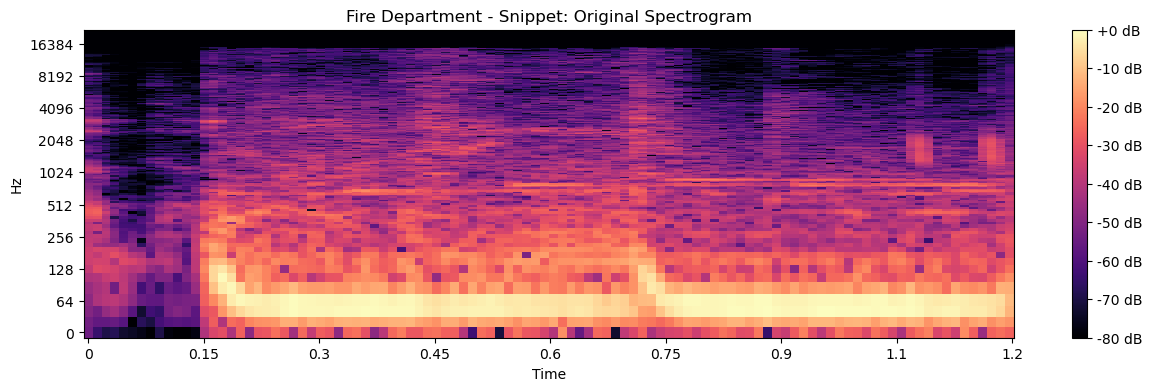

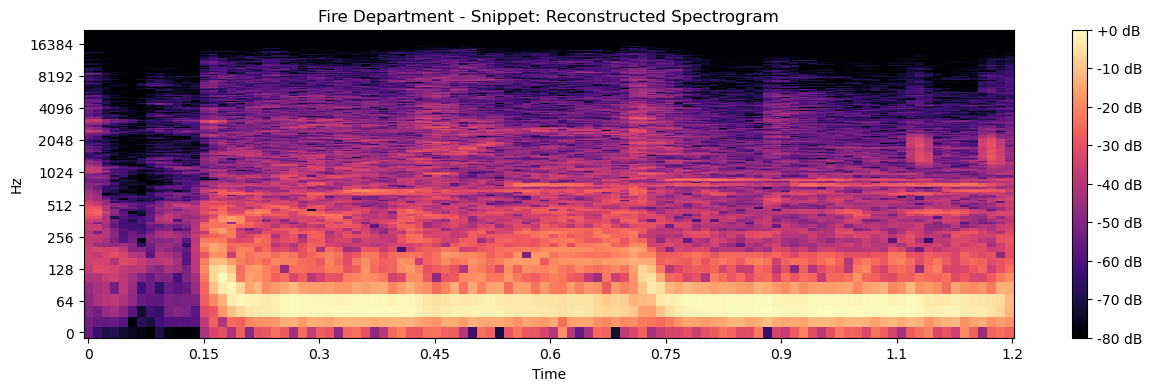

RMSE of reconstruction: 0.019924644731386672
Sample reconstruction complete -> starting FFT
FFT Complete -> constructing charts


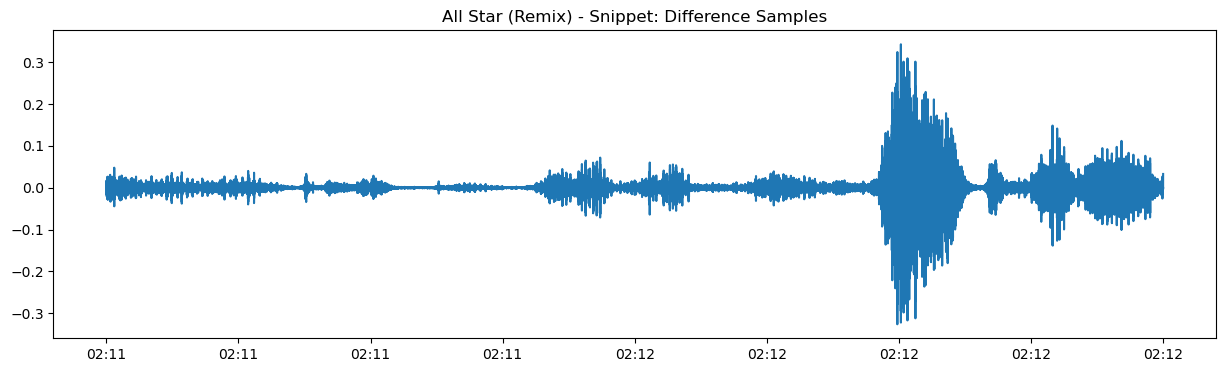

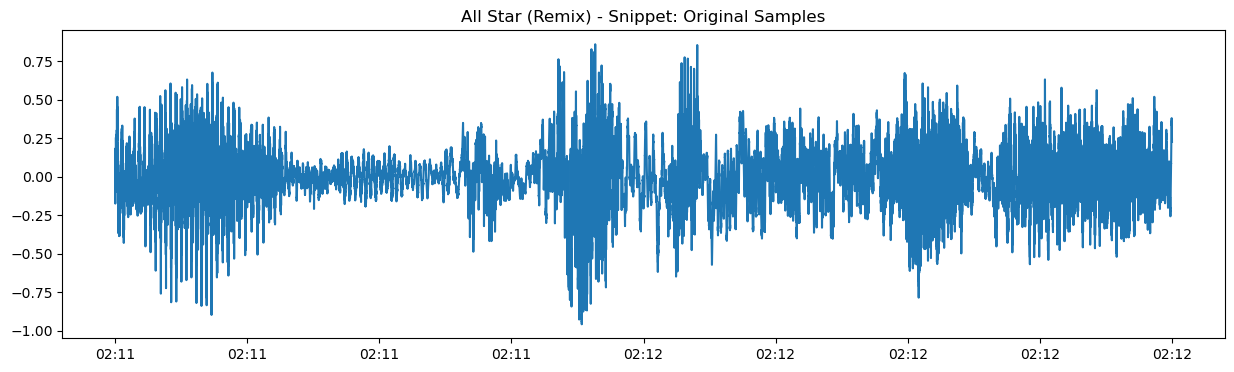

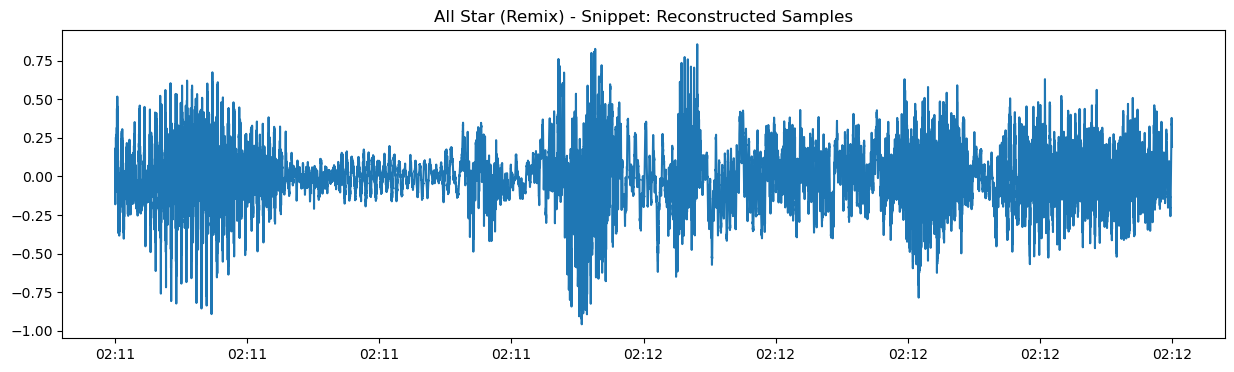

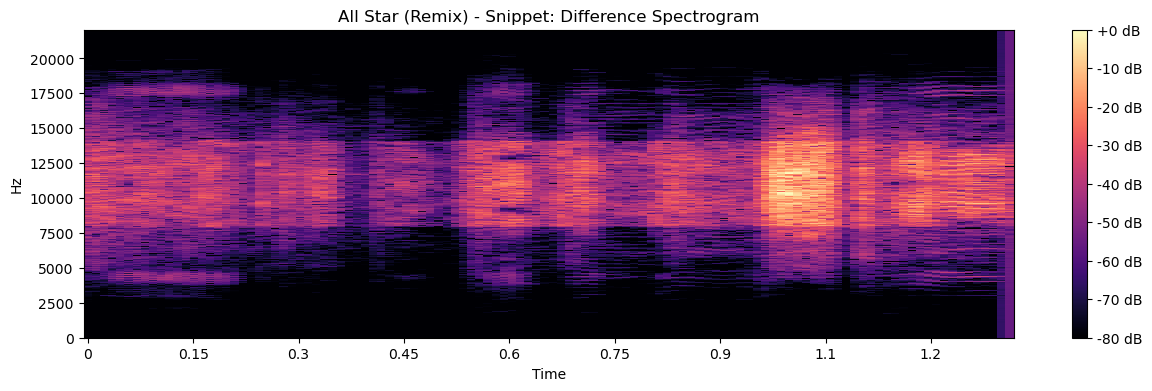

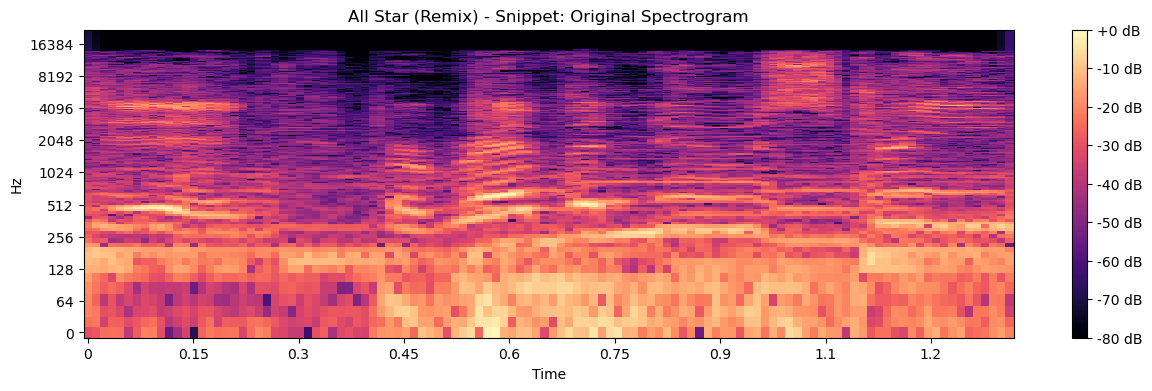

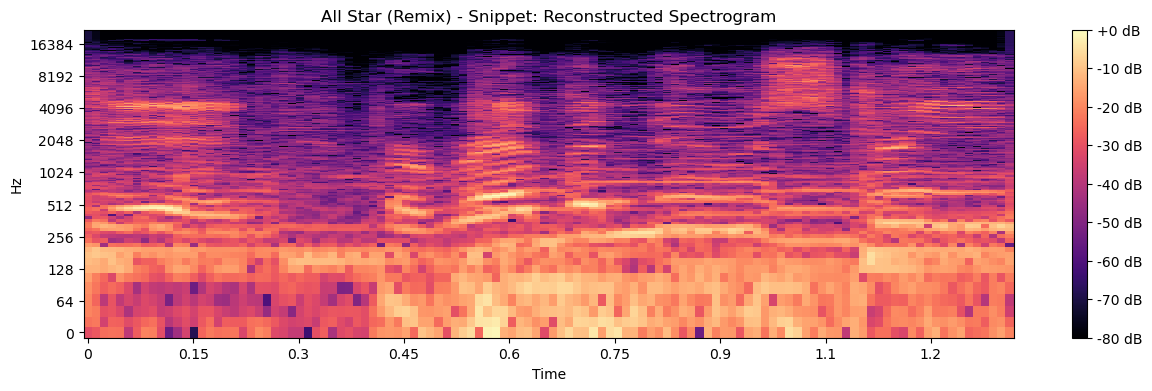

In [34]:
### This runs a full test on the provided file
wrap.full_pipeline("samples/Cloonee - Sun Goes Down.mp3", save_dir='cloonee', testname='Sun Goes Down - Snippet', chunks=128, chunk_num=64)
wrap.full_pipeline("samples/Bas - Tribe with J.Cole.mp3", save_dir='bas', testname='Tribe - Snippet', chunks=200, chunk_num=100)
wrap.full_pipeline("samples/call the fire department we just nuked the building.wav", save_dir='nuke', testname='Fire Department - Snippet', chunks=3, chunk_num=2)
wrap.full_pipeline("samples/Hey Now Youre A Keemstar.wav", save_dir="keem", testname="All Star (Remix) - Snippet", chunks=128,chunk_num=100)



RMSE of reconstruction: 0.012160959600966796
Sample reconstruction complete -> starting FFT
FFT Complete -> constructing charts


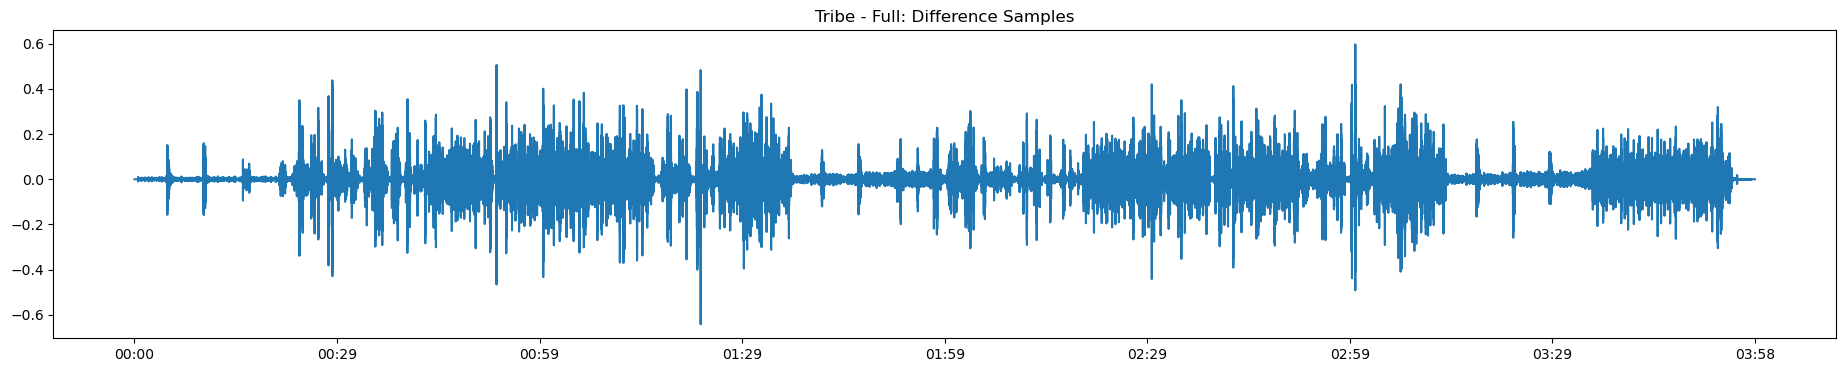

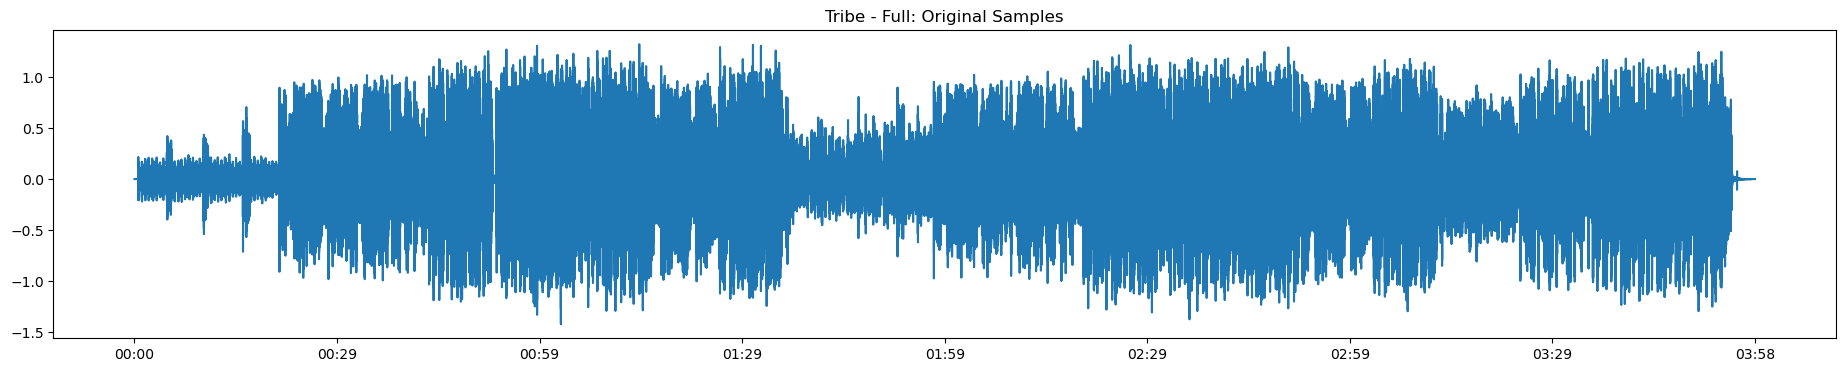

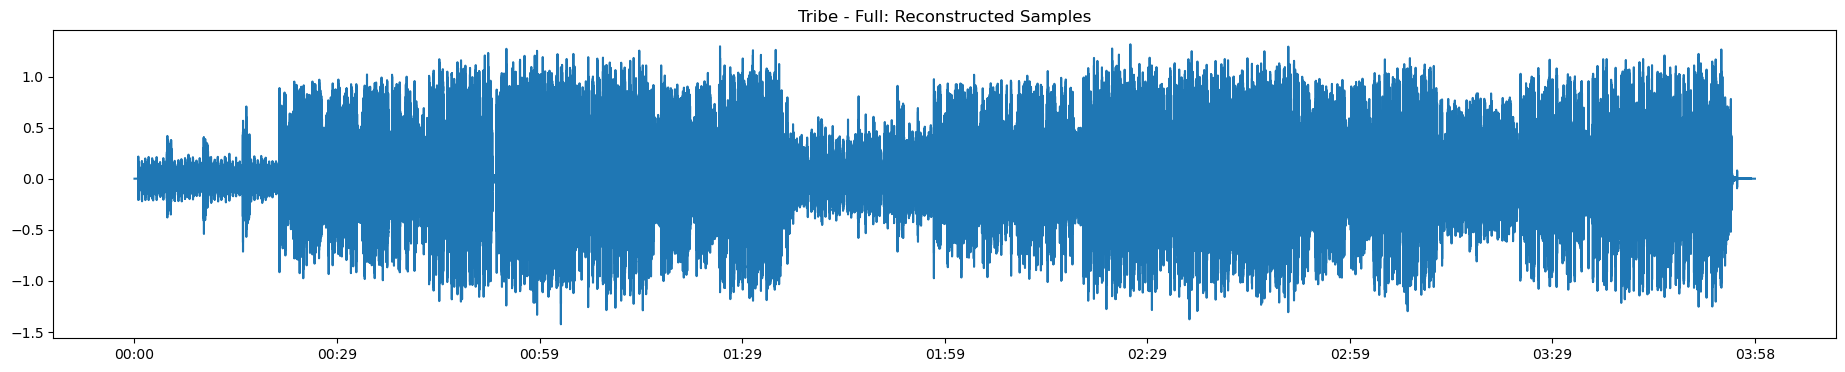

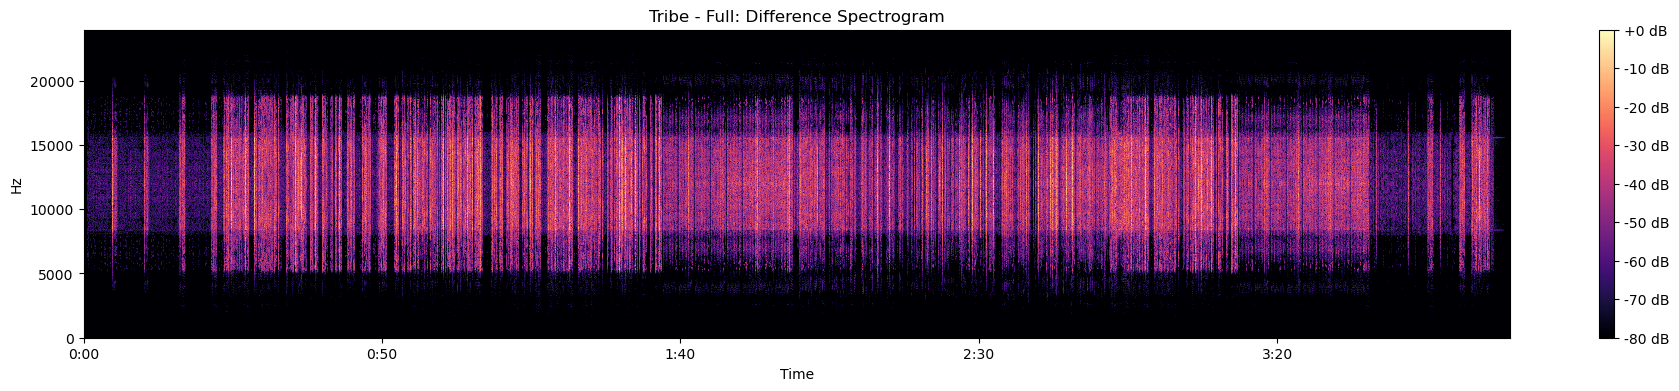

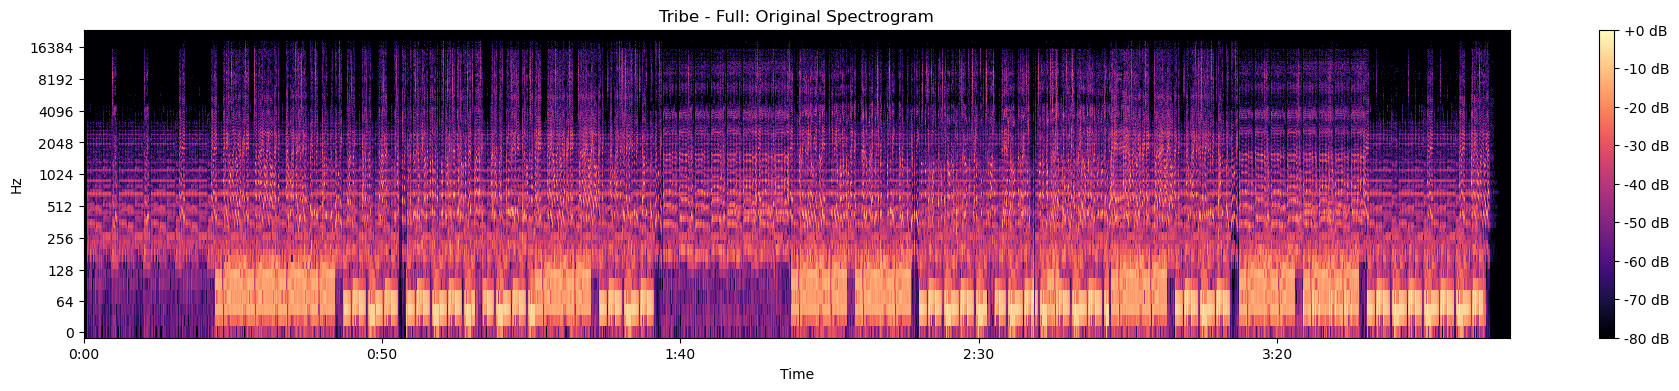

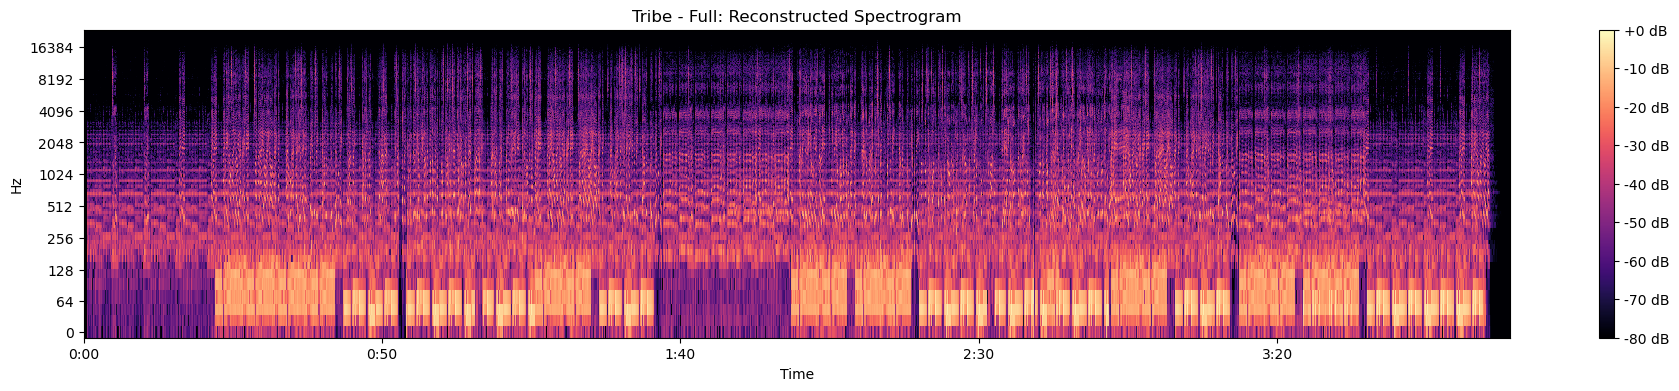

In [35]:
wrap.full_pipeline("samples/Bas - Tribe with J.Cole.mp3", save_dir='bas_full', testname='Tribe - Full')

In [5]:
wrap.librosa.get_fftlib()

<module 'numpy.fft' from '/usr/lib/python3/dist-packages/numpy/fft/__init__.py'>

In [ ]:
full_pipeline("samples/440Hz_44100Hz_16bit_05sec.mp3", save_dir='a_note', testname='A_Note_Tone')
## This one is kinda interesting, it looks like the spectrogram might be picking up on
## the "resonant error frequencies" for the cubic spline? maybe its just an artifact of the noise

In [ ]:
full_pipeline("samples/sample-0.mp3", save_dir='rand-samp0', testname='Snippet-0')

In [ ]:
full_pipeline("samples/sample-2.mp3", save_dir='rand-samp2', testname='Snippet-2')

In [ ]:
full_pipeline("samples/sample-1.mp3", save_dir='rand-samp1', testname='Snippet-1')

In [ ]:
full_pipeline("samples/sample-3.mp3", save_dir='rand-samp3', testname='Snippet-3')

In [ ]:
smps, sr = mp3_to_samples(

In [ ]:
tribe_samps,sr = wrap.mp3_to_samples("samples/Bas - Tribe with J.Cole.mp3")
# anote,_ = mp3_to_samples("samples/440Hz_44100Hz_16bit_05sec.mp3")
tribe_samps = tribe_samps[:len(tribe_samps)//32]

In [ ]:
hlv_trb = wrap.remove_half_samples(tribe_samps)
spl = wrap.get_interp_fun(hlv_trb) # cubic interpolation of reduced sample set
reconstructed = wrap.interp_odd_samples(hlv_trb,spl,len(tribe_samps))

In [ ]:
wrap.graph_samples(tribe_samps, sr)
wrap.graph_samples(reconstructed, sr)
wrap.graph_samples(hlv_trb, sr)

In [ ]:
freq_recon,freq_recon_ = wrap.samples_to_freq(reconstructed)
freq_orig,freq_orig_ = wrap.samples_to_freq(tribe_samps)

In [ ]:
wrap.graph_spectro(freq_orig,sr)
wrap.graph_spectro(freq_recon,sr)

In [ ]:
wrap.save_samples_to_wav(diff_samples,sr,"tribe_first32nd_diff.wav")

In [ ]:

wrap.mp3_to_samples("samples/sample-0.mp3")